In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd  

%matplotlib inline

In [2]:
lmbda = np.linspace(0, 1, 100)

def eighen_val1(lmbda):
    return (6+ (15*lmbda) + 2 * math.sqrt(2) * math.sqrt(2 + (12*lmbda) + (27* lmbda*lmbda))) / 4.

def eighen_val2(lmbda):
    return (6+ (15*lmbda) - 2 * math.sqrt(2) * math.sqrt(2 + (12*lmbda) + (27* lmbda*lmbda))) / 4.

def eighen_val3(lmbda):
    return (10+ (15*lmbda) + 2 * math.sqrt(2) * math.sqrt(2 + (27* lmbda*lmbda))) / 4.

def eighen_val4(lmbda):
    return (10+ (15*lmbda) - 2 * math.sqrt(2) * math.sqrt(2 + (27* lmbda*lmbda))) / 4.

In [3]:
e1 = [eighen_val1(l) for l 1in lmbda]
e2 = [eighen_val2(l) for l in lmbda]
e3 = [eighen_val3(l) for l in lmbda]
e4 = [eighen_val4(l) for l in lmbda]

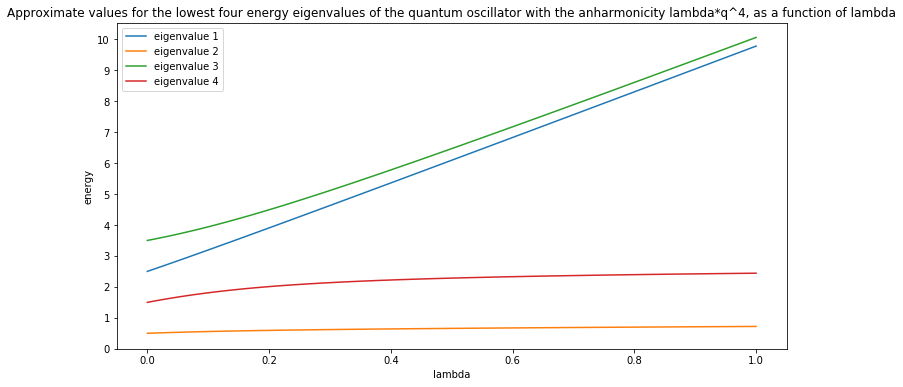

In [4]:
plt.figure(figsize=(12,6))
plt.plot(lmbda, e1, label = 'eigenvalue 1')
plt.plot(lmbda, e2, label = 'eigenvalue 2')
plt.plot(lmbda, e3, label = 'eigenvalue 3')
plt.plot(lmbda, e4, label = 'eigenvalue 4')
plt.xlabel('lambda')
plt.ylabel('energy')
plt.yticks(np.arange(0,11))
plt.xticks(np.linspace(0, 1.0 ,6))
plt.legend(loc='best')
title = plt.title('Approximate values for the lowest four energy eigenvalues of the quantum oscillator with the anharmonicity lambda*q^4, as a function of lambda')

In [5]:
one_by_n = 1. / np.arange(7,21)
one_by_n

array([0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
       0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ,
       0.05882353, 0.05555556, 0.05263158, 0.05      ])

In [6]:
def create_q(j, k):
    q = np.empty((j,k), dtype=np.double)
    for i in range(j):
        for l in range(k):
            if abs(i-l) == 1:
                q[i][l] = math.sqrt(i+l+1) / 2.
            else:
                q[i][l] = 0.0
    return q

def create_h0(j):
    h0 = np.empty((j,j), dtype=np.double)
    for i in range(j):
        for l in range(j):
            if i == l:
                h0[i][l] = i+ (1./ 2.)
            else:
                h0[i][l] = 0.0
    return h0

In [7]:
create_q(4,4)

array([[0.        , 0.70710678, 0.        , 0.        ],
       [0.70710678, 0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 1.22474487],
       [0.        , 0.        , 1.22474487, 0.        ]])

In [8]:
create_h0(4)

array([[0.5, 0. , 0. , 0. ],
       [0. , 1.5, 0. , 0. ],
       [0. , 0. , 2.5, 0. ],
       [0. , 0. , 0. , 3.5]])

In [9]:
e0s = []
for i in range(7,21):
    h0 = create_h0(i)
    q = create_q(i,i)
    lmbd = 0.1

    hn = h0 + lmbd * np.dot(np.dot(np.dot(q , q) , q) , q)
    es = np.sort(np.linalg.eigvals(hn))
   
    e0s.append(es[0])
e0s

[0.5591062583247677,
 0.5591339924825087,
 0.5591552382840972,
 0.5591435462735316,
 0.5591463788165149,
 0.5591465993000959,
 0.5591461666109455,
 0.5591463603516422,
 0.559146331717485,
 0.5591463188932289,
 0.5591463308901983,
 0.5591463263188087,
 0.5591463270210477,
 0.5591463273960666]

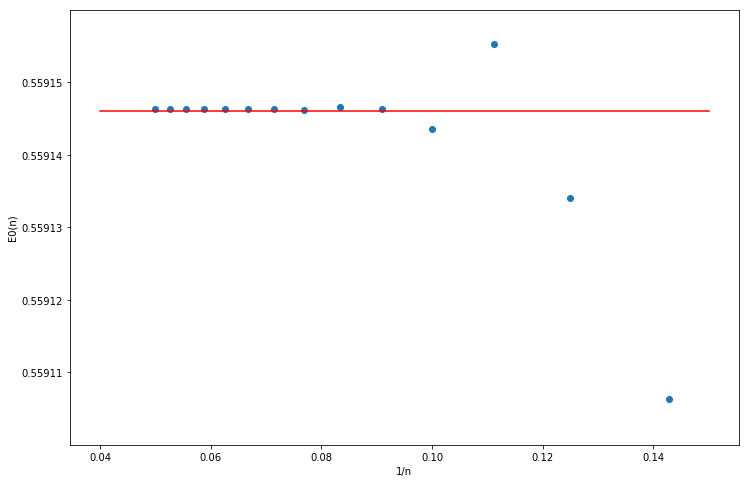

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x = one_by_n, y = e0s)
plt.ylim((0.55910000000,0.559160000000))
x = np.linspace(0.04, 0.15, 15)
plt.plot(x, [0.559146000]*len(x), color='red' )
plt.yticks([0.55911,0.55912,0.55913,0.55914,0.55915], ['0.55911','0.55912','0.55913','0.55914','0.55915'])
plt.xlabel('1/n')
lb = plt.ylabel('E0(n)')

In [11]:
np.linalg.eigvals(np.arange(1,17).reshape(4,4))

array([ 3.62093727e+01, -2.20937271e+00, -3.18863232e-15, -1.34840081e-16])

In [12]:
np.linalg.eigvals(np.arange(1,26).reshape(5,5))

array([ 6.86420807e+01+0.00000000e+00j, -3.64208074e+00+0.00000000e+00j,
       -2.90915693e-15+2.38171334e-15j, -2.90915693e-15-2.38171334e-15j,
        1.97408863e-16+0.00000000e+00j])

In [13]:
e5s = []
for lmbd in np.linspace(0,1,100):
    h0 = create_h0(20)
    q = create_q(20,20)
    hn = h0 + lmbd * np.dot(np.dot(np.dot(q , q) , q) , q)
    es = np.sort(np.linalg.eigvals(hn))
   
    e5s.append(es[:5])
e5s = np.array(e5s).T

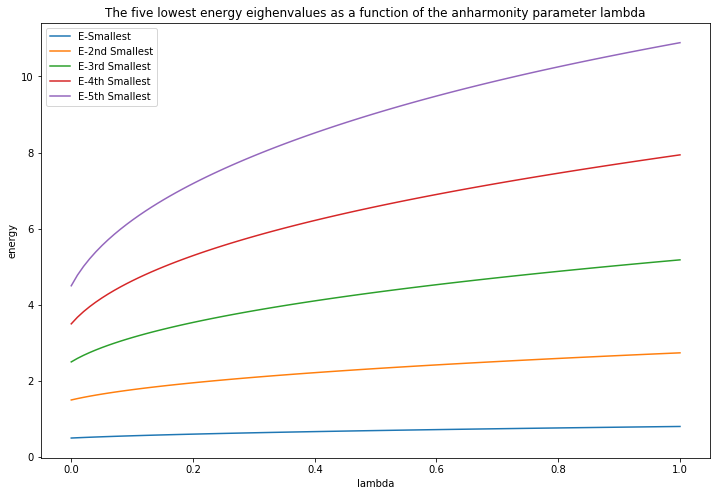

In [14]:
lmbda = np.linspace(0, 1, 100)
plt.figure(figsize=(12,8))
plt.plot(lmbda, e5s[0], label='E-Smallest')
plt.plot(lmbda, e5s[1], label='E-2nd Smallest')
plt.plot(lmbda, e5s[2], label='E-3rd Smallest')
plt.plot(lmbda, e5s[3], label='E-4th Smallest')
plt.plot(lmbda, e5s[4], label='E-5th Smallest')
plt.xlabel('lambda')
plt.ylabel('energy')
plt.legend(loc='best')
title = plt.title('The five lowest energy eighenvalues as a function of the anharmonity parameter lambda')